In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.shape

(14999, 10)

In [7]:
df.duplicated().sum()

3008

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(11991, 10)

/home/shreyash/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

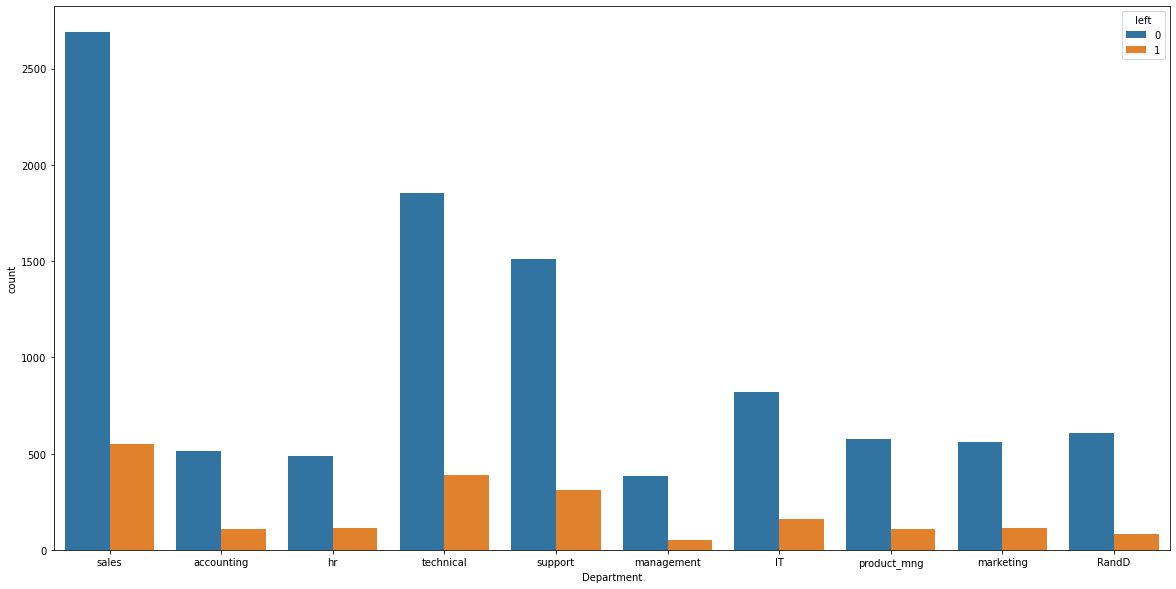

In [10]:
plt.figure(figsize=(20,10))
sns.countplot("Department",data=df,hue="left")

<AxesSubplot:>

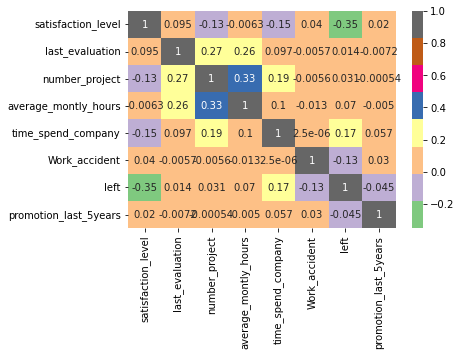

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="Accent")

Lets divide left column in two object for analysis

In [12]:
left_1 = df[df.left ==1]
left_1.shape

(1991, 10)

In [13]:
left_0 = df[df.left ==0]
left_0.shape

(10000, 10)

In [14]:
df_mean = df.groupby("left").mean()
df_mean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


<AxesSubplot:xlabel='Department', ylabel='satisfaction_level'>

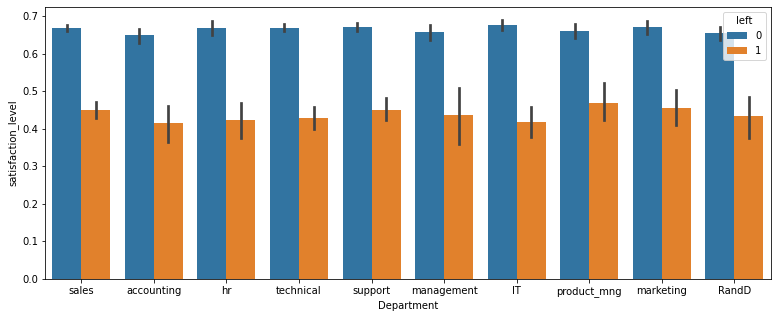

In [15]:
plt.figure(figsize=(13,5))
sns.barplot(x='Department', y = 'satisfaction_level',data = df, hue = 'left')

<AxesSubplot:xlabel='Department', ylabel='time_spend_company'>

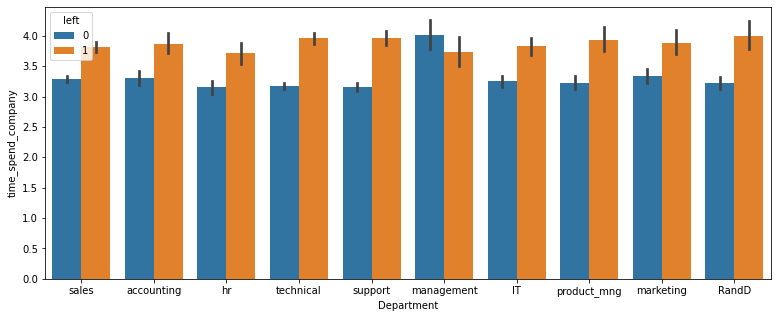

In [16]:
plt.figure(figsize=(13,5))
sns.barplot(x='Department', y = 'time_spend_company',data = df, hue = 'left')

<AxesSubplot:xlabel='Department', ylabel='promotion_last_5years'>

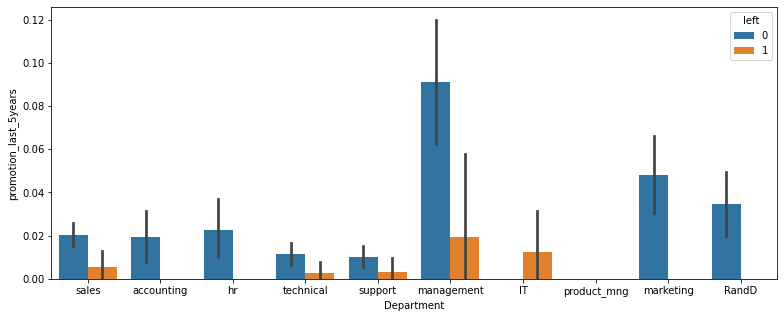

In [17]:
plt.figure(figsize=(13,5))
sns.barplot(x='Department', y = 'promotion_last_5years',data = df, hue = 'left')

As we can conclude that reason of being left employee is due to three factor which was affecting most:
1. Satisfaction level
2. Time spend in company 
3. Promotion

For futher more analysis lets take salary column

In [18]:
df1 = pd.get_dummies(df.salary,prefix="salary")
df1.shape

(11991, 3)

In [19]:
df2 = df[['satisfaction_level','average_montly_hours','promotion_last_5years']]
df2.shape

(11991, 3)

With the help of Normalizer we convert number into range of 0 and 1 approx

In [20]:
from sklearn.preprocessing import Normalizer
norm_df = Normalizer().fit_transform(df2)


In [21]:
df_norm = pd.DataFrame(norm_df, columns = df2.columns)
df_norm.shape

(11991, 3)

In [22]:
df2.shape

(11991, 3)

In [28]:
df_final = pd.concat([df_norm.reset_index(drop=True),df1.reset_index(drop=True)], axis = 1)

df_final.shape

#df_final = pd.concat([df_norm,df1], axis= 1)
#df_final.dropna().shape

(11991, 6)

# Lets Train and Test the Model using Logistic Regression

In [24]:
x = df_final
x.shape

(11991, 6)

In [25]:
y = df.left
y.shape

(11991,)

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)


In [29]:
print(f"x_train_shape:{x_train.shape} & x_test_shape:{x_test.shape}")

x_train_shape:(8993, 6) & x_test_shape:(2998, 6)


In [30]:
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
clf.score(x_test,y_test)

0.8425617078052035